# Amal Vinob

# logistic regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
phon_df = pd.read_csv("./phon.csv")

In [4]:
phon_df

,phoneno,age,gender,zipcode,calls,sms,mms,charges,coverage,complaint,sim,phone,prepost,churn
0,5974,1,Male,91107,160,25,1,490,0,4,Dual Sim,Andoid,Prepaid,0
1,4535,1,Male,90089,150,45,19,340,0,3,Dual Sim,Andoid,Prepaid,0
2,4016,1,Male,94720,100,39,15,110,0,1,Single Sim,Andoid,Prepaid,0
3,8523,2,Male,94112,270,35,9,1000,0,1,Single Sim,Andoid,Prepaid,0
4,5052,2,Female,91330,100,35,8,450,0,4,Single Sim,Andoid,Prepaid,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4704,3,Male,92697,190,29,3,400,0,1,Single Sim,Andoid,Postpaid,0
4996,3149,1,Male,92037,40,30,4,150,1,4,Single Sim,Andoid,Postpaid,0
4997,7402,3,Male,93023,30,63,39,240,0,2,Single Sim,Andoid,Prepaid,0
4998,5742,2,Male,90034,50,65,40,490,0,3,Single Sim,Andoid,Postpaid,0


In [5]:
phon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   phoneno    5000 non-null   int64 
 1   age        5000 non-null   int64 
 2   gender     5000 non-null   object
 3   zipcode    5000 non-null   int64 
 4   calls      5000 non-null   int64 
 5   sms        5000 non-null   int64 
 6   mms        5000 non-null   int64 
 7   charges    5000 non-null   int64 
 8   coverage   5000 non-null   int64 
 9   complaint  5000 non-null   int64 
 10  sim        5000 non-null   object
 11  phone      5000 non-null   object
 12  prepost    5000 non-null   object
 13  churn      5000 non-null   int64 
dtypes: int64(10), object(4)
memory usage: 547.0+ KB


In [6]:
phon_df.shape

(5000, 14)

In [7]:
phon_df.columns

Index(['phoneno', 'age', 'gender', 'zipcode', 'calls', 'sms', 'mms', 'charges',
       'coverage', 'complaint', 'sim', 'phone', 'prepost', 'churn'],
      dtype='object')

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [9]:
import statsmodels.api as sm

# checking null value

In [10]:
phon_df.isna().sum()

phoneno      0
age          0
gender       0
zipcode      0
calls        0
sms          0
mms          0
charges      0
coverage     0
complaint    0
sim          0
phone        0
prepost      0
churn        0
dtype: int64

# outlier detection

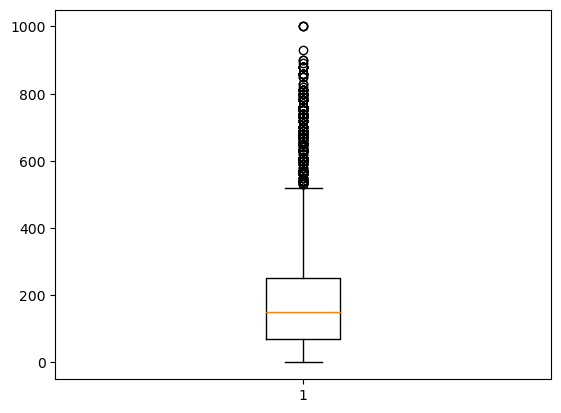

In [11]:
plt.boxplot(x = phon_df.calls);

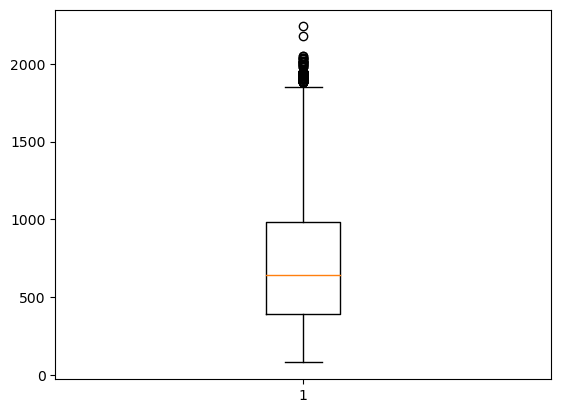

In [12]:
plt.boxplot(x = phon_df.charges);

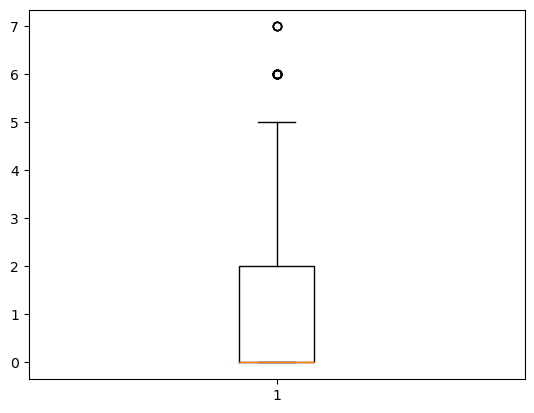

In [13]:
plt.boxplot(x = phon_df.coverage);

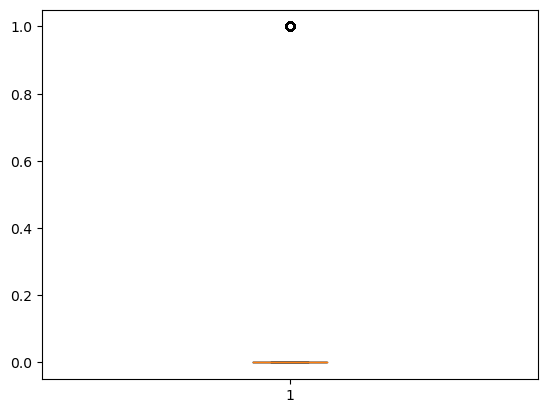

In [14]:
plt.boxplot(x = phon_df.churn);

##### form outlier analysis we get to know calls,charges and coverages have outliears

In [45]:
phon_df['calls'] = np.where(phon_df['calls'] > 500 , 500 , phon_df['calls'])


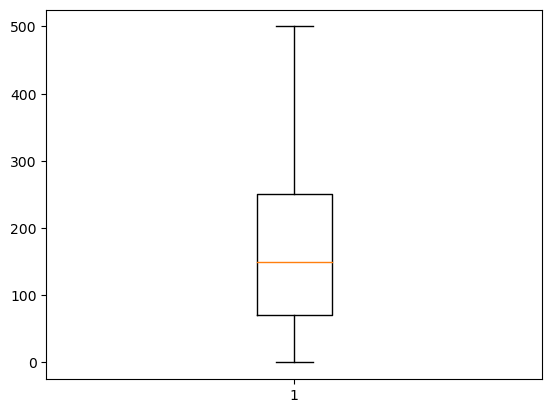

In [46]:
plt.boxplot(x = phon_df.calls);

In [47]:
phon_df.columns

Index(['age', 'gender', 'calls', 'sms', 'mms', 'charges', 'coverage',
       'complaint', 'sim', 'phone', 'prepost', 'churn'],
      dtype='object')

In [48]:
phon_df['charges'] = np.where(phon_df.charges > 1850, 1850, phon_df['charges'])

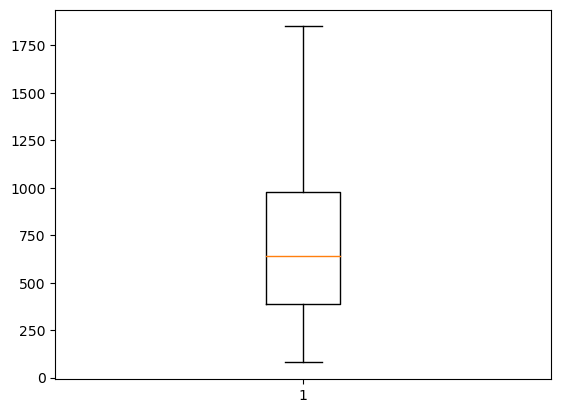

In [49]:
plt.boxplot(x = phon_df.charges);

In [50]:
phon_df['coverage'] = np.where(phon_df.coverage > 5, 5, phon_df.coverage)
phon_df['coverage']

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    1
4997    0
4998    0
4999    0
Name: coverage, Length: 5000, dtype: int64

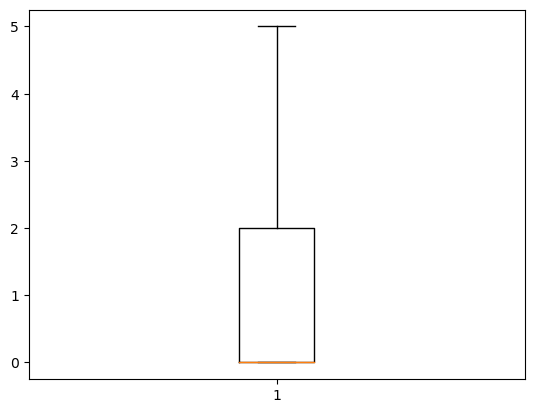

In [51]:
plt.boxplot(x = phon_df.coverage);

In [52]:
phon_df.shape

(5000, 12)

### droping unwanted columns

In [23]:
phon_df = phon_df.drop(['phoneno','zipcode'],axis=1)

In [24]:
phon_df.age.unique()

array([1, 2, 3], dtype=int64)

In [25]:
phon_encoded = pd.get_dummies(phon_df, columns=['gender', 'coverage', 'sim', 'phone', 'prepost'])
phon_encoded

,age,calls,sms,mms,charges,complaint,churn,gender_Female,gender_Male,coverage_0,...,coverage_2,coverage_3,coverage_4,coverage_5,sim_Dual Sim,sim_Single Sim,phone_Andoid,phone_IOS,prepost_Postpaid,prepost_Prepaid
0,1,160,25,1,490,4,0,0,1,1,...,0,0,0,0,1,0,1,0,0,1
1,1,150,45,19,340,3,0,0,1,1,...,0,0,0,0,1,0,1,0,0,1
2,1,100,39,15,110,1,0,0,1,1,...,0,0,0,0,0,1,1,0,0,1
3,2,270,35,9,1000,1,0,0,1,1,...,0,0,0,0,0,1,1,0,0,1
4,2,100,35,8,450,4,0,1,0,1,...,0,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3,190,29,3,400,1,0,0,1,1,...,0,0,0,0,0,1,1,0,1,0
4996,1,40,30,4,150,4,0,0,1,0,...,0,0,0,0,0,1,1,0,1,0
4997,3,30,63,39,240,2,0,0,1,1,...,0,0,0,0,0,1,1,0,0,1
4998,2,50,65,40,490,3,0,0,1,1,...,0,0,0,0,0,1,1,0,1,0


In [26]:
phone_encoded = pd.get_dummies(phon_df, columns=['gender', 'coverage', 'sim', 'phone', 'prepost'])
phon_encoded


,age,calls,sms,mms,charges,complaint,churn,gender_Female,gender_Male,coverage_0,...,coverage_2,coverage_3,coverage_4,coverage_5,sim_Dual Sim,sim_Single Sim,phone_Andoid,phone_IOS,prepost_Postpaid,prepost_Prepaid
0,1,160,25,1,490,4,0,0,1,1,...,0,0,0,0,1,0,1,0,0,1
1,1,150,45,19,340,3,0,0,1,1,...,0,0,0,0,1,0,1,0,0,1
2,1,100,39,15,110,1,0,0,1,1,...,0,0,0,0,0,1,1,0,0,1
3,2,270,35,9,1000,1,0,0,1,1,...,0,0,0,0,0,1,1,0,0,1
4,2,100,35,8,450,4,0,1,0,1,...,0,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3,190,29,3,400,1,0,0,1,1,...,0,0,0,0,0,1,1,0,1,0
4996,1,40,30,4,150,4,0,0,1,0,...,0,0,0,0,0,1,1,0,1,0
4997,3,30,63,39,240,2,0,0,1,1,...,0,0,0,0,0,1,1,0,0,1
4998,2,50,65,40,490,3,0,0,1,1,...,0,0,0,0,0,1,1,0,1,0


In [27]:
x = phone_encoded

y = phon_df['churn']

In [39]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# import pandas as pd


# X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.8, random_state=45)


# logit_model = sm.Logit(Y_train, X_train)
# logit_result = logit_model.fit()

# print(logit_result.summary())


In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=45)

In [53]:
LR_model = LogisticRegression(max_iter=1000)
LR_model.fit(X_train,Y_train);

C:\Users\amalv\anaconda3\jupyter\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
predictions = LR_model.predict(X_test)

accuracy_score(Y_test, predictions)

1.0

In [55]:
confusion_matrix(Y_test, predictions)

array([[905,   0],
       [  0,  95]], dtype=int64)

In [56]:
classification_report(Y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       905\n           1       1.00      1.00      1.00        95\n\n    accuracy                           1.00      1000\n   macro avg       1.00      1.00      1.00      1000\nweighted avg       1.00      1.00      1.00      1000\n'

# wow accuracy 100%